<div style="border:solid Chocolate 2px; padding: 40px">

<b>Дарья, приветствую!</b>

Буду рада с тобой познакомиться. Меня зовут Евгения Маракова и я буду ревьюером твоего проекта. Если ты не против, то предлагаю общаться на "ты":) Если удобнее на "вы", то нет проблем, только скажи об этом.

В процессе работы ты встретишь комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Что они значат, смотри ниже:
    <br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Решение на этом шаге является полностью правильным. У тебя хорошо получается проводить АВ-тестирование и анализировать данные!
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Можно лучше⚠️:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>Необходимо исправить❌:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы😊
    
Свой комментарий помечай так, как показано ниже, тогда нам будет легче вести диалог, а мне выполнить повторную проверку проекта.
    <div class="alert alert-info"> <b>Комментарий студента: </b> </div>
    


# Проект «Принятие решений в бизнесе»

Проведем анализ интернет-магазина. В первой части проекта приоретизируем гипотезы методами ICE и RICE. Во второй части проведем оценку результатов реализованного A/B-теста. 

Основные метрики, которые мы рассмотрим:
- Выручка по группам;
- Средний чек по группам;
- Конверсия (среднее количество заказов на посетителя) по группам;
- Количество заказов по пользователям;
- Стоимости заказов;
- Статистические значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным и отфильтрованным данным без аномалий;
- Статистические значимости различий в среднем чеке заказа между группами по «сырым» данным и отфильтрованным данным без аномалий.

В нашем распоряжении три датасета.

Файл `/datasets/hypothesis.csv`:
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл `/datasets/orders.csv`:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Супер, что добавила описание проекта и данных, так будет легче каждому соореентироваться в работе!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Можно лучше⚠️:</b> Будет здорово, если в вводной части уделишь внимание решаемой бизнес-задаче. Это позволит заказчику анализа понять, на что был направлен проект. В нашем случае, происходит оценка результатов АВ теста, поэтому рекомендую указать в целях к этой части - изучение каких основных метрик будет проводиться в ходе эксперимента. В реальных проектах хорошо приводить дизайн АВ теста (или его техническое задание).
</div>

<div class="alert alert-info"> 
<b>Комментарий студента: </b> 

Спасибо! Добавила

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2<a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Отлично!
</div>

In [2]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
import scipy.stats as stats

## Загрузка данных и подготовка к анализу

### Загрузка данных

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [5]:
# Сделаем так, чтобы гипотезы отображались полностью
pd.options.display.max_colwidth = 150

# Выведем на экран первые 5 строк датафреймов
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Можно лучше⚠️:</b> Давай выведем названия гипотез полностью. Рекомендую использовать настройку pd.options.display.max_colwidth = 100, где 100 - количество символов. Кстати, pandas имеет много настроек - https://pandas.pydata.org/docs/user_guide/options.html. В сети есть публикации по этому поводу, например, https://towardsdatascience.com/8-commonly-used-pandas-display-options-you-should-know-a832365efa95. Лучше все же использовать дополнительные настройки тогда, когда в этом есть прямая необходимость, как в нашем проекте.
</div>

<div class="alert alert-info"> 
<b>Комментарий студента: </b> 

Спасибо! Исправила

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2<a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Красота!
</div>

In [4]:
# Напишем функцию, выводящую общую информацию о датафрейме
def dt_info(dt, dt_name):
    print('\033[1m' + f"Информация для датафрейма '{dt_name}':" + '\033[0m')
    dt.info()
    print()

# Выведем на экран общую информацию о датафреймах
dt_info(hypothesis, 'hypothesis')
dt_info(orders, 'orders')
dt_info(visitors, 'visitors')

Информация для датафрейма 'hypothesis':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Информация для датафрейма 'orders':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Информация для датафрейма 'vi

Мы ознакомились с таблицами.

В загруженном датафрейме hypothesis 5 столбцов, 9 строк с данными о гипотезах. Исходя из информации, выведенной выше, можем заметить, что имена столбцов заданы не корректно. Пропусков в данных нет.

Датафрейм orders содержит 5 столбцов и 1197 строк. Названия столбцов 'transactionId' и 'visitorId' необходимо переименовать, а также изменить тип данных для столбца с датой события. Пропусков в данных нет.

Датафрейм visitors содержит 3 столбца, 62 строки. Необходимо только изменить тип данных для столбца date. Пропусков в данных нет.

Перейдем к предобработке данных.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Данные загружены верно!
</div>

### Предобработка данных

#### Работа с названиями столбцов

In [5]:
# Переименуем столбцы датафрейма hypothesis в соответствии с принятыми правилами названия
hypothesis.columns = hypothesis.columns.str.lower().str.replace(' ', '_')

# Проверим, все ли получилось
print(hypothesis.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


In [6]:
# Переименуем столбцы датафрейма orders в соответствии с принятыми правилами названия
orders = orders.rename(columns={
    'transactionId': 'transaction_id',
    'visitorId': 'visitor_id'
})

# Проверим, все ли получилось
print(orders.columns)

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


Столбцы переименованы в соответствии с правилами.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Хорошо, такой формат намного лучше!
</div>

#### Работа с типами данных

In [7]:
# Изменим тип данных для датафрейма 'orders'
orders['date'] = pd.to_datetime(orders['date'])

# Изменим тип данных для датафрейма 'visitors'
visitors['date'] = pd.to_datetime(visitors['date'])

In [8]:
# Выведем на экран общую информацию о датафреймах, чтобы проверить изменения
dt_info(hypothesis, 'hypothesis')
dt_info(orders, 'orders')
dt_info(visitors, 'visitors')

Информация для датафрейма 'hypothesis':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Информация для датафрейма 'orders':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64

Типы данных успешно изменены.

#### Работа с дубликатами

In [9]:
# Напишем функцию, выводящую информацию о дубикатах
def duplicates(dt, dt_name):
    # Проверим явные дубликаты
    print('\033[1m' + f"Количество явных дубликатов в таблице '{dt_name}':" + '\033[0m')
    print(f'{dt.duplicated().sum()}')
    print()
    
    # Для проверки неявных дубликатов, выведем уникальные значения всех столбцов заданного датафрейма
    for column in dt:
        print('\033[1m' + f'Количества уникальных значений для столбца {column}:' + '\033[0m')
        print(dt[column].value_counts())
        print()

In [10]:
# Проверим наличие дубликатов в датафрейме hypothesis
duplicates(hypothesis, 'hypothesis')

Количество явных дубликатов в таблице 'hypothesis':
0

Количества уникальных значений для столбца hypothesis:
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Запустить акцию, дающую скидку на товар в день рождения                                                         1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользов

In [11]:
# Проверим наличие дубликатов в датафрейме orders
duplicates(orders, 'orders')

Количество явных дубликатов в таблице 'orders':
0

Количества уникальных значений для столбца transaction_id:
1658608862    1
2211880073    1
3913205113    1
437656952     1
3592105335    1
             ..
2872509092    1
2013919907    1
3154167297    1
2960804513    1
4281129020    1
Name: transaction_id, Length: 1197, dtype: int64

Количества уникальных значений для столбца visitor_id:
4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitor_id, Length: 1031, dtype: int64

Количества уникальных значений для столбца date:
2019-08-05    48
2019-08-12    47
2019-08-14    47
2019-08-15    46
2019-08-06    46
2019-08-01    45
2019-08-28    45
2019-08-02    44
2019-08-27    44
2019-08-08    43
2019-08-19    43
2019-08-29    42
2019-08-07    42
2019-08-26    41
2019-08-22    41
2019-08-09    41
2019-08-03    40
2019-08-23    40
2019-08-10    39
2019

In [12]:
# Проверим наличие дубликатов в датафрейме visitors
duplicates(visitors, 'visitors')

Количество явных дубликатов в таблице 'visitors':
0

Количества уникальных значений для столбца date:
2019-08-27    2
2019-08-24    2
2019-08-08    2
2019-08-14    2
2019-08-20    2
2019-08-26    2
2019-08-01    2
2019-08-07    2
2019-08-13    2
2019-08-19    2
2019-08-25    2
2019-08-31    2
2019-08-06    2
2019-08-12    2
2019-08-18    2
2019-08-30    2
2019-08-21    2
2019-08-05    2
2019-08-11    2
2019-08-17    2
2019-08-23    2
2019-08-29    2
2019-08-04    2
2019-08-10    2
2019-08-16    2
2019-08-22    2
2019-08-28    2
2019-08-03    2
2019-08-09    2
2019-08-15    2
2019-08-02    2
Name: date, dtype: int64

Количества уникальных значений для столбца group:
A    31
B    31
Name: group, dtype: int64

Количества уникальных значений для столбца visitors:
610    2
718    2
654    2
490    2
609    1
717    1
719    1
720    1
721    1
594    1
722    1
468    1
595    1
756    1
735    1
769    1
711    1
668    1
487    1
361    1
746    1
619    1
748    1
621    1
369    1
628  

Явные дубликаты отсутствуют, неявных также выявлено не было.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Типы данных заменили, убедились в корректности данных, можем двигаться дальше!
</div>

#### Проверка на попадание одного и того же пользователя одновременно и в группу А, и в группу B

In [13]:
# Создадим список идентификаторов пользователей в группе A
orders_a = orders[orders['group'] == 'A']['visitor_id'].tolist()

# Создадим список идентификаторов пользователей в группе B
orders_b = orders[orders['group'] == 'B']['visitor_id'].tolist()

# Создадим список с пересекающимися пользователями
common_visitors = list(set(orders_a) & set(orders_b))

# Выведем на экран количество пересекающихся пользователей
print(f'Всего пользователей, попавших сразу в две группы: {len(common_visitors)}')

# Выведем на экран долю таких пользователей среди общего числа уникальных пользователей
print(f'Доля таких пользователей от общего числа уникальных пользователей: {round((len(common_visitors) / orders["visitor_id"].nunique())*100, 2)}%')

Всего пользователей, попавших сразу в две группы: 58
Доля таких пользователей от общего числа уникальных пользователей: 5.63%


Обнаружены пользователи, которые попали в обе группы. Всего таких пользователей: 58. Один и тот же пользователь не должен участвовать одновременно в обеих группах, так как это искажает результаты теста, это является нарушением правил проведения A/B-тестов.

Пользователи, попавшие сразу в обе группы, составляют примерно 5.63% от общего числа уникальных пользователей. Это может повлиять на достоверность и точность результатов теста. Процент таких пользователей небольшой, удалять такие строки мы не будем, т.к. в любом случае, к результатам всего проведенного A/B-теста необходимо относиться настороженно, возможно, ошибки возникали не только при распределении пользователей. Однако, в первую очередь необходимо обратить внимание на метод распределения пользователей между группами.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> 
По поводу пересечения пользователей - конечно это не хорошо, и при проведении теста такое лучше избегать. Обычно, этих пользователей можно отфильтровать, но! в наших данных количество посетителей в день агрегировано. Поэтому, пользователей, которые совершили покупки в двух группах, мы можем удалить только из данных по покупкам. Тем самым мы немного занизим количество покупок на посетителя.

Оптимально при работе с исходными данными отфильтровать пользователей, которые участвовали в двух группах из таблицы с визитами тоже. Но, поскольку мы этого сделать не можем, то продолжаем тест как есть, подсветив этот момент.
</div>

## Приоритизация гипотез

### Метод ICE

ICE (impact, confidence, efforts / влияние, уверенность, усилия) — один из самых популярных способов приоритизации задач. 

In [14]:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 1)

display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структура категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


Методом ICE топ-3 гипотез составили:
- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Принято!
</div>

### Метод RICE

Фреймворк RICE состоит из четырех компонент:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу.

In [15]:
hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 1)

display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending = False))

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Методом RICE в топ-4 гипотез оказались:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Отлично, что вывела таблицу дважды и применила сортировку по одному из фреймворков - так мы более наглядно можем наблюдать различия в их работе!
</div>

### Общий результат

In [16]:
# Выведем на экран таблицу полностью, чтобы проанализировать результаты
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.2


Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" затронет максимальное количество пользователей, и, учитывая также высокую занчимость остальных компонентов, выходит в лидеры, если учитывать показатель reach (охват). "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" также имеет высоке охваты пользователей, которые увидят такие изменения.

А вот с гипотезой "Запустить акцию, дающую скидку на товар в день рождения" произошло обратное. В ICE она была на первом месте, оказывая сильное влияние на пользователей, однако она затрагивает только пользователей, у которых в этот период день рождения, поэтому охват этой гипотезы небольшой, и, она стала лишь пятой.

То же самое происходит и с другими гипотезами. При использовании метода RICE, собирается больше данных о продукте и, соответственно, полученые результаты более объективны.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Совершенно верно!
</div><br/>

## Анализ A/B-теста

Был проведен A/B-тест, итоги которого хранятся в датафреймах orders и visitors. Проведем анализ полученных результатов.

Создадим датафрейм `cumulative_data` со столбцами: 
- `date` — дата;
- `group` — группа A/B-теста (A или B);
- `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
- `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [17]:
# Создадим массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# Получим агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                        orders['group'] == x['group'])
                                                        ].agg({'date': 'max',
                                                               'group': 'max',
                                                               'transaction_id': 'nunique',
                                                               'visitor_id': 'nunique',
                                                               'revenue': 'sum'}), axis=1
                                       ).sort_values(by=['date', 'group'])

# Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                           visitors['group'] == x['group'])
                                                           ].agg({'date' : 'max', 
                                                                  'group' : 'max', 
                                                                  'visitors' : 'sum'}), axis=1
                                        ).sort_values(by=['date','group'])

# Объединим кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Выведем на экран первые пять строк полученого датафрейма 
display(cumulative_data.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### Выручка по группам
Построим график кумулятивной выручки по группам.

In [18]:
# Датафрейм с кумулятивной выручкой по дням и кумулятивным количеством заказов в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивной выручкой по дням и кумулятивным количеством заказов в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

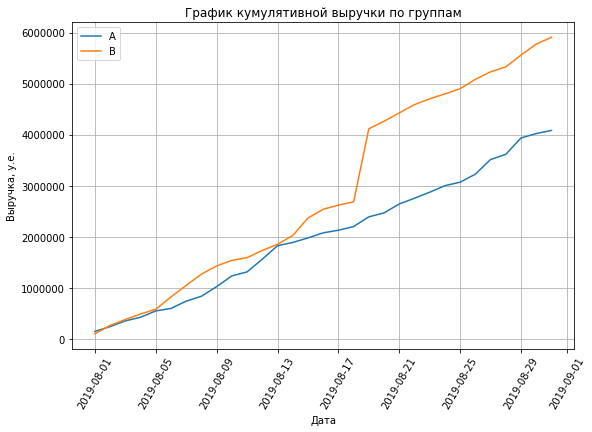

In [19]:
# Зададим размер для графика
plt.figure(figsize=(9, 6))

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

# Зададим другие настройки графика
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, у.е.')
plt.xticks(rotation = 60)
plt.grid()
plt.legend()

# Настроим формат оси Y
formatter = ticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Отобразим полученый график
plt.show()

По графику видно, что кумулятивная выручка группы А меньше, чем у группы B, она растет линейно. А в группе В есть резкий скачок, приблизительно 2019-08-19, что может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в этой выборке.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Согласна, все может быть!
</div>

### Средний чек по группам
Построим график кумулятивного среднего чека по группам.

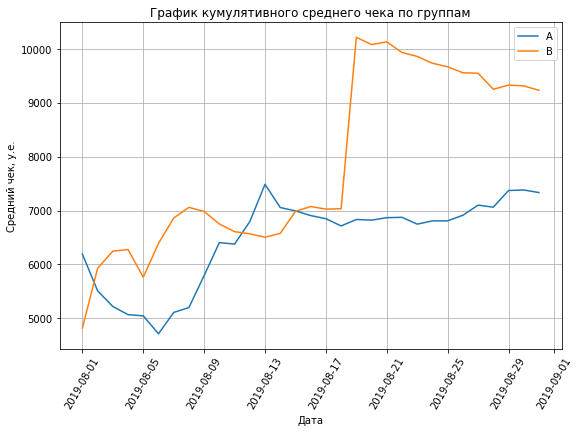

In [20]:
# Зададим размер для графика
plt.figure(figsize=(9, 6))

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

# Зададим другие настройки графика
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек, у.е.')
plt.xticks(rotation = 60)
plt.grid()
plt.legend()

# Отобразим полученый график
plt.show()

Средний чек становится равномерным ближе к концу теста: он установился для группы A, однако после резкого скачка продолжает падать для группы B. Как и предполагалось выше, возможно, в группу B попали крупные заказы, повлиявшие и на средний чек в том числе, что отражает резкий всплеск в районе 2019-08-19 и на этом графике.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Молодец, верно, группа В нестабильна. Возможно, в данную группу в середине теста попали крупные заказы. Необходимо будет учесть этот факт при принятии решения о результатах A/B-теста:)
</div>

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

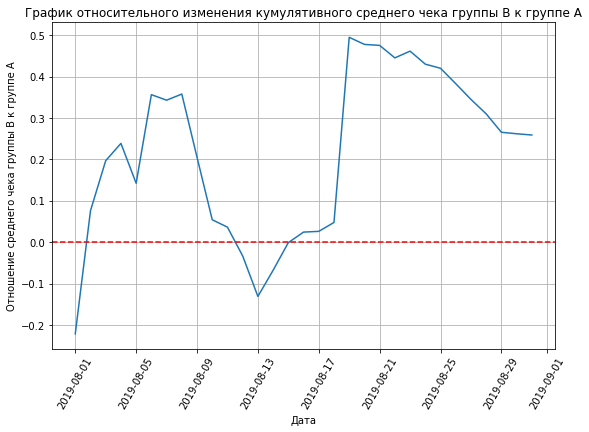

In [21]:
# Соберем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, 
                                                       left_on='date', 
                                                       right_on='date', 
                                                       how='left', 
                                                       suffixes=['_a', '_b'])

# Зададим размер для графика
plt.figure(figsize=(9, 6))

# Построим график отношения средних чеков
plt.plot(merged_cumulative_revenue['date'], 
         ((merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/
          (merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a']))-1
        )

# Добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')

# Зададим другие настройки графика
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы B к группе A')
plt.xticks(rotation = 60)
plt.grid()

# Отобразим полученый график
plt.show()

Относительное изменение кумулятивного среднего чека группы В к группе A повторяет поведение графика кумулятивного среднего чека. График резко "скачет" в нескольких точках. Все три графика указывают на наличие каких-то выбросов.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Отлично!
</div>

### Среднее количество заказов на посетителя по группам
Построим график кумулятивного среднего количества заказов на посетителя по группам.

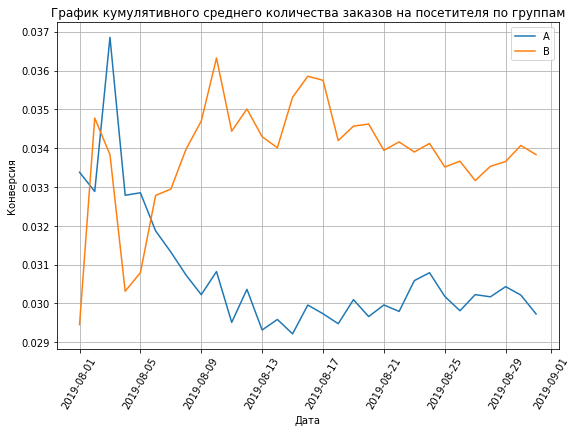

In [22]:
# Посчитаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# Отделим данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# Отделим данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# Зададим размер для графика
plt.figure(figsize=(9, 6))

# Потроим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

# Зададим другие настройки графика
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation = 60)
plt.grid()
plt.legend()

# Отобразим полученый график
plt.show()

На графике мы видим, что в начале месяца были резкие скачки и падения, однако после 2019-08-06 конверсия группы B стала стабильно выше конверсии группы А и конверсии обеих групп начали фиксироваться.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Умничка, правильно!
</div>

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

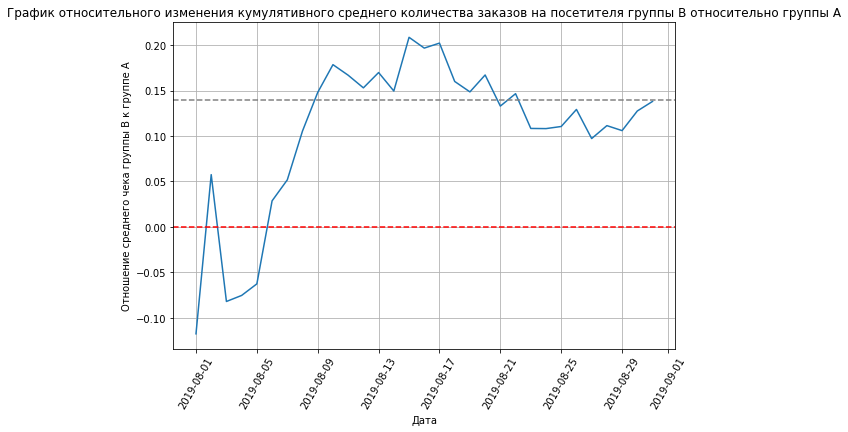

In [23]:
# Соберем данные в одном датафрейме
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], 
                                                                               left_on='date', 
                                                                               right_on='date', 
                                                                               how='left', 
                                                                               suffixes=['A', 'B'])

# Зададим размер для графика
plt.figure(figsize=(9, 6))

# Построим график отношения среднего количества заказов на посетителя группы B к группе A
plt.plot(merged_cumulative_conversions['date'], 
         (merged_cumulative_conversions['conversionB']/
         merged_cumulative_conversions['conversionA'])-1
        )

# Добавляем оси X
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')

# Зададим другие настройки графика
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы B к группе A')
plt.xticks(rotation = 60)
plt.grid()

# Отобразим полученый график
plt.show()

По графику мы также можем подтвердить, что в начале месяца конверсии были нестабильны, но на 6й день месяца мы видим стабильный прирост, который установился в пределах 10-15% выше конверсии группы А к концу периода.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Хорошо, давай посмотрим на аномалии:)
</div>

### Количество заказов по пользователям
Построим точечный график количества заказов по пользователям и посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [24]:
# Создадим датафрейм с группировкой количества заказов по пользователям
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})

# Переименуем столбцы
orders_by_users.columns = ['user_id', 'orders']

# Выведем на экран первые 10 пользователей, с наибольшим кол-вом заказов
display(orders_by_users.sort_values(by='orders', ascending=False).head(10)) 

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


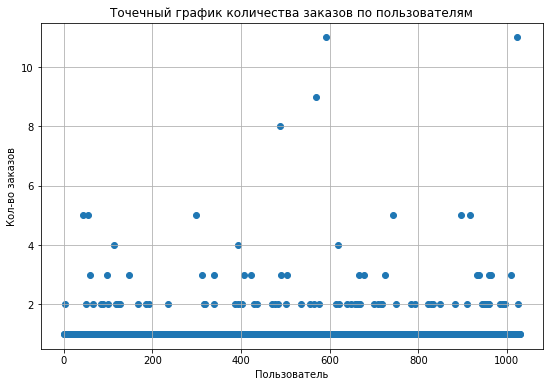

In [25]:
# Зададим размер для графика
plt.figure(figsize=(9, 6))

# Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])

# Зададим другие настройки графика
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Кол-во заказов')
plt.grid()

# Отобразим полученную диаграмму
plt.show()

Большинство пользователей делают один заказ, но при этом есть доля пользователей, которая совершает по 2 заказа. Меньше пользователей совершают от 3 до 11 заказов за месяц.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Верно!
</div>

In [26]:
# Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз. 

Выберем 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеим аномальных пользователей по ней.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Отлично, идем дальше!
</div>

### Стоимости заказов
Построим точечный график стоимостей заказов и посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [27]:
# Отсортируем таблицу orders по убыванию стоимости заказа revenue
display(orders.sort_values(by='revenue', ascending=False).head(10))

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


В группе B есть два заказа, с сильно выбивающейся суммой - 1 294 500 у.е. и 202 740 у.е. Это явные аномалии, построим график без этих двух сильно аномальных значений стоимости заказов.

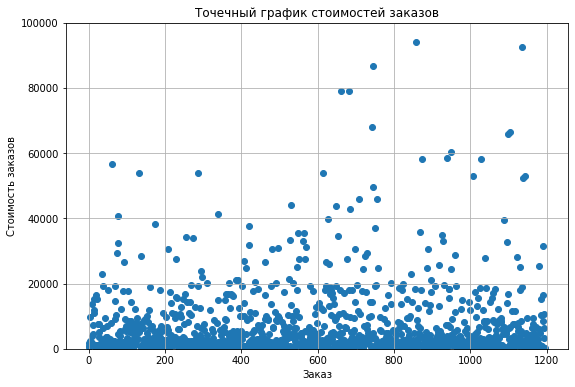

In [28]:
# Зададим размер для графика
plt.figure(figsize=(9, 6))

# Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

# Зададим другие настройки графика
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказ')
plt.ylabel('Стоимость заказов')
plt.grid()

# Отобразим полученную диаграмму без двух сильно аномальных значений стоимости заказов - 1294500 и 202740, 
# держа их в голове, чтобы график был более информативным
plt.ylim (0, 100000)
plt.show()

На точечном графике стоимостей заказов видно, что в основном стоимость заказов составляет до 20 тыс. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Правильно!
</div>

In [29]:
# Посчитаем 95-й и 99-й перцентили стоимости заказов
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28 000 у.е. И не больше, чем у 1% заказов — дороже 58 233 у.е.

Верхней границей стоимости заказов выберем 28 000 у.е., и отсеим аномальных пользователей по ней.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Замечательное решение, молодец!
</div>

### Статистическая значимость 

Подготовим данные и создадим датафрейм `data` со следующими колонками:
- `date` — дата;
- `orders_per_date_a` — количество заказов в выбранную дату в группе A;
- `revenue_per_date_a` — суммарная выручка в выбранную дату в группе A;
- `orders_per_date_b` — количество заказов в выбранную дату в группе B;
- `revenue_per_date_b` — суммарная выручка в выбранную дату в группе B;
- `orders_cummulative_a` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenue_cummulative_a` — суммарная выручка до выбранной даты включительно в группе A;
- `orders_cummulative_b` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenue_cummulative_b` — суммарная выручка до выбранной даты включительно в группе B;
- `visitors_per_date_a` — количество пользователей в выбранную дату в группе A;
- `visitors_per_date_b` — количество пользователей в выбранную дату в группе B;
- `visitors_cummulative_a` — количество пользователей до выбранной даты включительно в группе A;
- `visitors_cummulative_b` — количество пользователей до выбранной даты включительно в группе B.

In [30]:
# Соберем данные по датам по посетителям из группы A
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# Соберем данные по датам по посетителям из группы B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# Соберем данные по датам по заказам из группы A
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

# Соберем данные по датам по заказам из группы B
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

# Объединим полученные ранее датафреймы в один по датам
data = (
    orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

# Выведем на экран первые пять строк общего датафрейма data
display(data.head(5)) 

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


А также напишем функцию для проверки гипотез о равенстве групп.

In [31]:
# Зададим функцию
def hypothesis_check(data_a, data_b):
    alpha = 0.05
    p_value = stats.mannwhitneyu(data_a, data_b)[1]
    print('P-value = {0:.3f}'.format(p_value))

    if (p_value < alpha):
        print('Отвергаем нулевую гипотезу: между группами есть разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что между группами есть различия')
    
    print()
    print('Относительный прирост В к А: {0:.2%}'.format(data_b.mean() / data_a.mean() - 1))

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Проверим, есть ли статическая значимость различий в конверсиях (среднем количестве заказов на посетителя) и какой относительный прирост конверсии группы B с помощью использования непараметрического критерия Манна-Уитни.

Для начала сформулируем гипотезы. Нулевая: различий в среднем количестве заказов на постетителя между группами нет. Альтернативная: различия в среднем между группами есть. Уровень статистической значимости alpha определим 0.05.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Гипотезы сформулированы верно!
</div>

In [32]:
# Создадим переменные orders_by_users_a и orders_by_users_b c количеством совершенных заказов по пользователям
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders']

# Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов
sample_a = pd.concat(
    [orders_by_users_a['orders'],pd.Series(
        0, 
        index=np.arange(
            data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
        ), name='orders')],
    axis=0
)

sample_b = pd.concat(
    [orders_by_users_b['orders'],pd.Series(
        0, 
        index=np.arange(
            data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
        ), name='orders')],
    axis=0
)

In [33]:
# Проверим гипотезы
hypothesis_check(sample_a, sample_b)

P-value = 0.017
Отвергаем нулевую гипотезу: между группами есть разница

Относительный прирост В к А: 13.81%


P-value = 0.017, меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы отвергаем. Среднее число заказов на пользователя группы B больше, чем среднее в группе А на 13,8%. Однако стоит помнить, что в этих данных есть выбросы.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Хорошо!
</div>

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [34]:
# Проверим гипотезы
hypothesis_check(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value = 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что между группами есть различия

Относительный прирост В к А: 25.87%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B больше среднего чека группы A на 25,87%.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Согласна!
</div>

#### Работа с аномальными значениями выборки

Ранее мы выбрали 2 заказа на одного пользователя за верхнюю границу числа заказов, и 28 000 у.е. верхней границей стоимости заказов, отсеим аномальных пользователей по этим границам. Так мы уберем 5% пользователей с большим числом заказов и 5% пользователей с дорогими заказами.

In [35]:
# Зададим ограничения
orders_lim = np.percentile(orders_by_users['orders'], 95)
revenue_lim = np.percentile(orders['revenue'], 95)

# Найдем идентификаторы пользователей с выбивающимся количеством заказов
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > orders_lim]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > orders_lim]['user_id'],
    ],
    axis=0,
)

# Найдем идентификаторы пользователей с выбивающейся стоимостью заказов
users_with_expensive_orders = orders[orders['revenue'] > revenue_lim]['visitor_id']

# Объединим полученные датафреймы
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Отфильтруем переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов,
# исключая аномальных пользователей
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0,
                  index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),
                  name='orders'),
                              ],
                              axis=0)

sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0,
                  index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),
                  name='orders'),
                              ],
                              axis=0)

# Выведем на экран количество и долю аномальных пользователей
print('Количество аномальных пользователей:',len(abnormal_users))
print('Доля аномальных пользователей {:.2%}'.format(len(abnormal_users) / len(orders['visitor_id'].unique())))

Количество аномальных пользователей: 74
Доля аномальных пользователей 7.18%


Всего зафиксировано 74 аномальных пользователей. Они составляют 7,18% от общего числа пользователей, участвующих в тесте.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Проверим, есть ли статическая значимость различий в конверсиях (в среднем количестве заказов на посетителя) c помощью критерия Манна-Уитни и узнаем какой относительный прирост конверсии группы B по очищенным данным.

Нулевая гипотеза: различий в среднем количестве заказов на постетителя между группами нет.
Альтернативная гипотеза: различия в среднем между группами есть. Уровень статистической значимости alpha определим 0.05.

In [36]:
# Проверим гипотезы
hypothesis_check(sample_a_filtered, sample_b_filtered)

P-value = 0.013
Отвергаем нулевую гипотезу: между группами есть разница

Относительный прирост В к А: 17.27%


Несмотря на обработку данных от аномалий, результат такой же - различии в среднем количестве заказов на посетителя между группами есть. Прирост у группы В относительно группы A составляет 17,27%.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Супер, двигаемся дальше!
</div>

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. Уровень статистической значимости alpha 0.05.

In [37]:
# Проверим гипотезы
hypothesis_check(
    orders[np.logical_and(orders['group'] == "A", np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'], 
    orders[np.logical_and(orders['group'] == "B", np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']
)

P-value = 0.738
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что между группами есть различия

Относительный прирост В к А: -1.96%


P-value все также значительно больше 0.05. Значит, причин отвергать нулевую гипотезу, нет. Однако разница между сегментами сократилась с 25.87% до -1.96%, средний чек в группе B даже стал незначительно ниже чем в группе A. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Отлично!
</div>

## Общий вывод

Был проведен анализ интернет-магазина. Работу можно разделить на две части. Сначала были приоретизированны гипотезы, затем был проведен анализ результатов A/B-теста.

**Приоретизация гипотез**

Был сформирован список из 8 гипотез, приоритеты которых мы определили с помощью методов приоритезации гипотез ICE и RICE. Так как при использовании метода RICE собирается больше данных о продукте, учитывается охват изменений, полученые результаты более подходят для нашей задачи, поэтому в выводе мы ориентированы на результаты этого метода. 

Наиболее перспективная гипотеза, которая затронет максимальное количество пользователей, и имеет хорошие показателями влияния и уверенности при средних затратах на внедрение, является гипотеза «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок». «Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа» также имеет хорошие показатели.

**Анализ A/B-теста**

В первую очередь стоит отметить, что на этапе предобработки данных мы выявили, что 58 пользователей попали в обе группы теста, тем самым частично исказив результаты. Пользователи, попавшие сразу в обе группы, составляют примерно 5,63% от общего числа уникальных пользователей. В первую очередь необходимо обратить внимание на метод распределения пользователей между группами.

В ходе анализы было выявлено, что:
- Большинство пользователей делают один заказ, не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз.
- В основном стоимость заказов составляет до 20 тыс., не более, чем у 5% заказов чек дороже 28 000 у.е. и не больше, чем у 1% заказов — дороже 58 233 у.е. В группе B есть два заказа, с сильно выбивающейся суммой - 1 294 500 у.е. и 202 740 у.е. 

Проведя анализ результатов A/B-теста мы пришли к следующим выводам:
- Есть статистически значимое различие в среднем числе заказов между группами как по исходным данным, так и по данным после удаления аномальных значений. Конверсия группы В выше, чем группы А, на 17,27%.
- Нет статистически значимого различия по среднему чеку между группами ни по исходным данным, ни по данным после удаления аномальных значений. В группе B, было два заказа с аномально большими выбросами, значительно влияющими на результаты. На что указывали все полученные графики. Поэтому, после фильтрации данных от аномалий, средний чек группы A, стал немного даже немного выше среднего чека группы B. 
- Кумулятивная выручка у группы В выше, чем у группы А.
- График различия среднего чека колеблется, хотя к концу периода наблюдения тоже показывает, что результаты группы B становятся лучше группы A. Но, как указано в пункте выше, после фильтрации данных, средний чек стал немного меньше по отношению к группе A.
- График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А и нет значительной тенденции к ухудшению. С середины месяца динамика конверсий обеих групп стабилизировалась.

На основании вышеперечисленого, рекомендуем остановить тест, зафиксировав победу группы B.



<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Решение на этом шаге является полностью правильным. Ты здорово разобралась во влиянии выбросов на результаты сравнения средних значений и отметила преимущество статистического теста при интерпретации результатов.
</div>

<div style="border:solid Chocolate 2px; padding: 40px">
Даша, давай подведем итоги. Ты большая молодец, что старалась и проделала такую большую работу. Мне понравилось, что ты наполнила проект развернутыми выводами и наглядно продемонстрировала каждое задание:) 
    
    Разберем над чем стоит поработать:
    
    1. Рекомендую:
    - указать решаемую бизнес-задачу;
    - вывести гипотезы полностью.
    
    Пересмотри работу и исправь ошибки. Обязательно пиши, если я могу тебе еще чем-то помочь. Удачи!)
  

<div class="alert alert-info"> 
<b>Комментарий студента: </b> 

Большое спасибо! :) Вопросов больше нет

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2<a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Даша, привет! Молодец, оперативно доработала парочку рекомендаций. Благодарю за обратную связь, работа принята, удачи в обучении!)
</div>